<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 35** | Projeto Final
Aálise de Dados **SQL**<br> 
Professor Mariane Neiva

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Kaggle;</li>
  <li>Introdução ao problema de negócios;</li>
  <li>Exploração de dados.</li>
</ol>


---

## 1\. Exploração e análise de dados de crédito com SQL

Como parte do projeto de conclusão dos módulos relacionados à análise de dados com o uso da linguagem SQL, iremos apresentar algumas análises básicas referentes a uma base de dados hipotética de créditos.



## 2\. Base de Dados

**2.1\. Visão Geral:**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

*   idade = idade do cliente
*   sexo = sexo do cliente (F ou M)
*   dependentes = número de dependentes do cliente
*   escolaridade = nível de escolaridade do clientes
*   salario_anual = faixa salarial do cliente
*   tipo_cartao = tipo de cartao do cliente
*   qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
*   iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
*   meses_inativo_12m = quantidade de meses que o cliente ficou inativo
*   limite_credito = limite de credito do cliente
*   valor_transacoes_12m = valor das transações dos ultimos 12 meses
*   vqtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses


A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: [texto do link](https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset)







**2.1\. Estrutura dos Dados:**

Após a criação da tabela, podemos verificar a estrutura dos dados através do comando:



```
# describe credito
```
Onde credito é o nome da tabela contendo os dados provenientes do arquivo csv descritos anteriormente.

O resultado é o seguinte:


```
idade               	int                 	                    
sexo                	string              	                    
dependentes         	int                 	                    
escolaridade        	string              	                    
salario_anual       	string              	                    
tipo_cartao         	string              	                    
qtd_produtos        	int                 	                    
iteracoes_12m       	int                 	                    
meses_inativo_12m   	int                 	                    
limite_credito      	float               	                    
valor_transacoes_12m	float               	                    
qtd_transacoes_12m  	int   
```

## 3\. Exploração dos Dados



A primeira parte da nossa análise consiste em entender a nossa base de dados para análise. Como primeiro passo, iremos verificar a quantidade de registros que fazem parte da nossa base.

Para isso, iremos utilizar o seguinte comando:

```
SELECT count(idade) FROM credito
```

O resultado deste **query** traz o valor **2564**, que representa a quantidade de registros na nossa tabela.

Como nossa base de representa as informações de créditos concedidas aos clientes do banco, podemos considerar que no cadastro dos clientes sempre teremos a informação de idade dos mesmos. Assim, a nossa coluna idade nunca apresentará regisntros nulos (ou em branco).

Porém, caso queiramos nos certificar e desconsiderar possíveis erros durante a geração desses dados, podemos evoluir a query anterior a fim de garantir que os registros nulos não sejam contabilizados. A ova query fica da seguinte forma:

```
SELECT count(idade) FROM credito
WHERE idade IS NOT null
```

O resultado obtido é semelhante à query anterior (**2564**), o que significa que **todos** os **clientes possuem** o **campo** de cadastro com a sua respectiva **idade**. 



Vamos agora analisar os limites de crétidos distintos oferecidos aos clientes da nossa base:

```
SELECT distinct limite_credito from credito 
ORDER BY limite_credito ASC
```

O resultado é o seguinte:


---


![query1[1].png](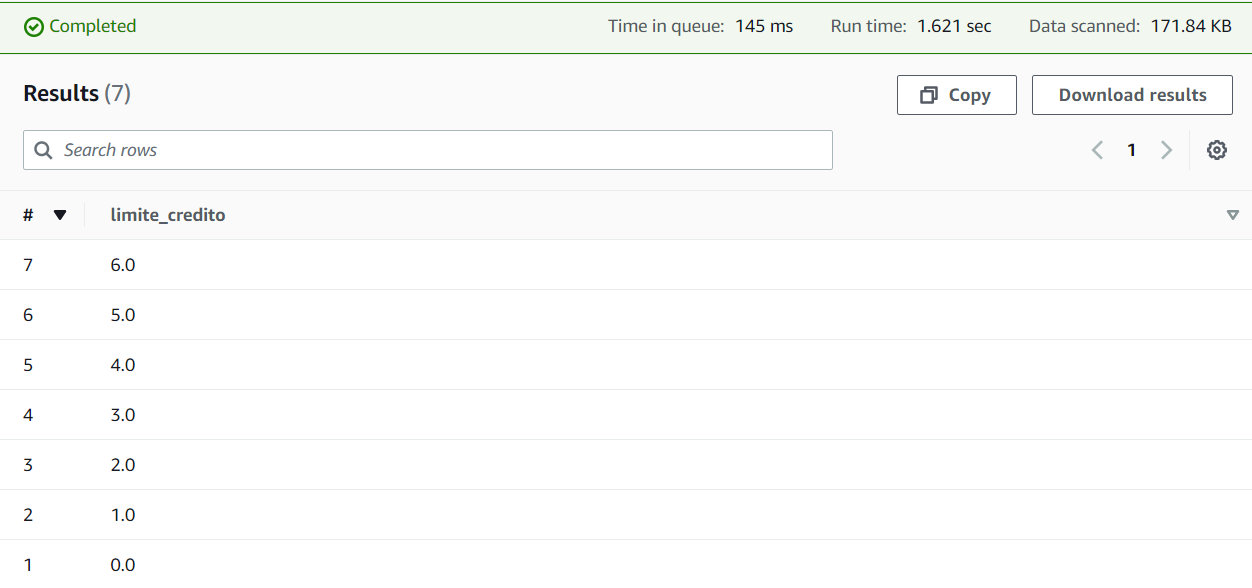)

Vamos agora procurar entender um pouco mais sobre a distribuição dessa classificação na nossa base de clientes:

```
SELECT count(idade) AS qtde, limite_credito FROM credito
GROUP BY limite_credito
ORDER BY limite_credito ASC
```

O resultado é o seguinte:





![query2[6].png](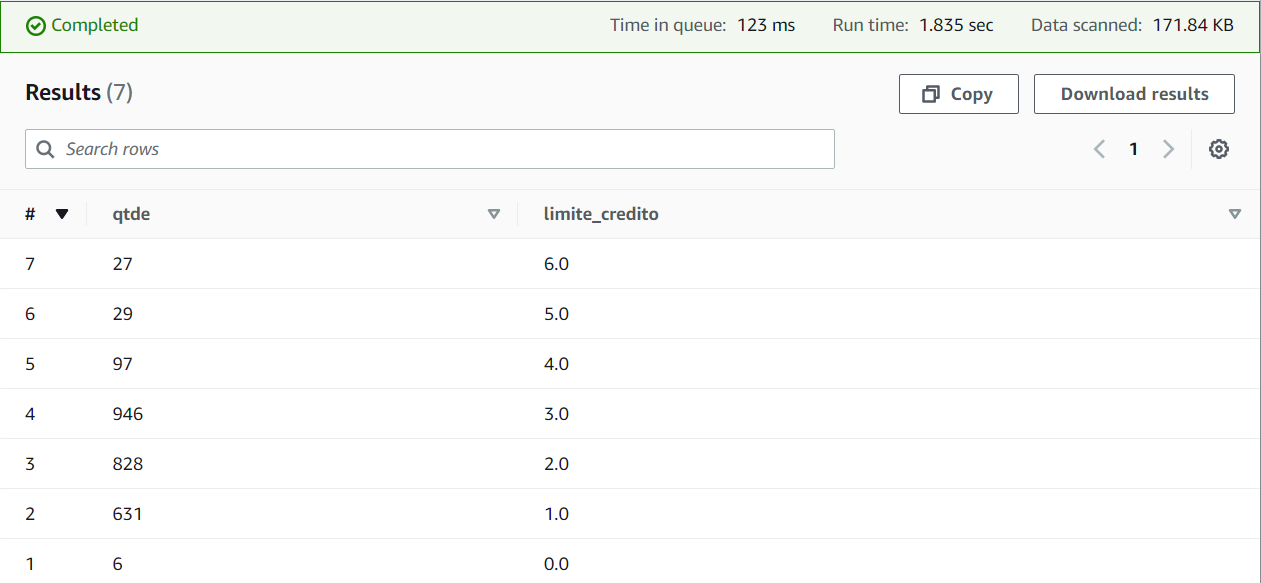)

Podemos constatar que a grande **maioria** dos clientes possuem um **limite de crédito** igual a **2** ou **3**, com **828** e **946** cliente nessas respectivas faixas.
O gráfico abaixo traz uma visualização mais clara dessa distribuição:

![query2_grafico[2].png](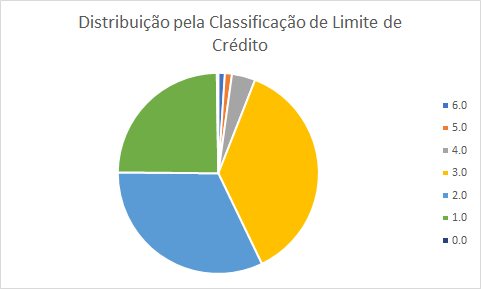)

Também é interessante verificarmos qual a correlação entre a média de gastos dos clientes de acordo com os seus respectivos limites de crétidos.

Para isso, executamos a seguinte query em nossa base:



```
SELECT avg(valor_transacoes_12m) AS media_gastos, limite_credito FROM credito
GROUP BY limite_credito
ORDER BY media_gastos ASC
```

O resultado é o seguinte:


![query3[1].png](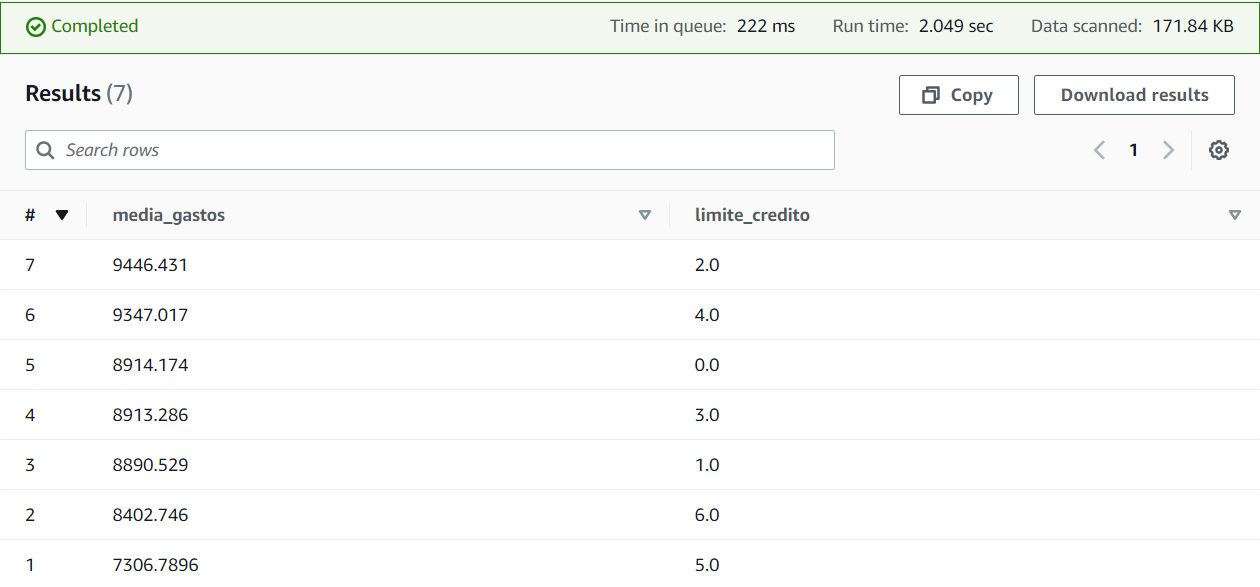)

Interessante observar que a **maior média dos gastos** está na **faixa 2** de limite de crétido, enquanto as **maiores faixas**, **6 e 5**, **apresentam** os **menores** **valores médios** das transações realizadas nos últimos 12 meses.

O gráfico a seguir ilustra melhor essa distribuição de valores médios das transações pela faixa de limite de crédito dos clientes:

![query3_grafico[1].png](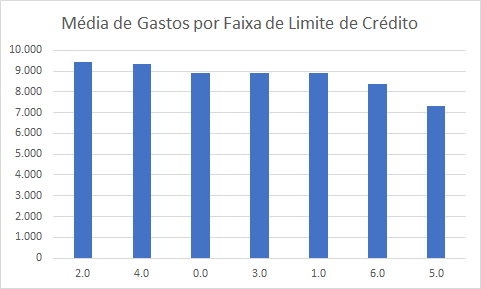)

Vamos analisar também se existe alguma correlação clara entre a faixa de crétido consedida aos clientes e a quantidade de transações realizadas no período (últimos 12 meses).


```
SELECT avg(qtd_transacoes_12m) AS media_transacoes, limite_credito FROM credito
GROUP BY limite_credito
ORDER BY media_transacoes ASC
```

Através da query acima, obtemos os seguintes resultados:



![query4[1].png](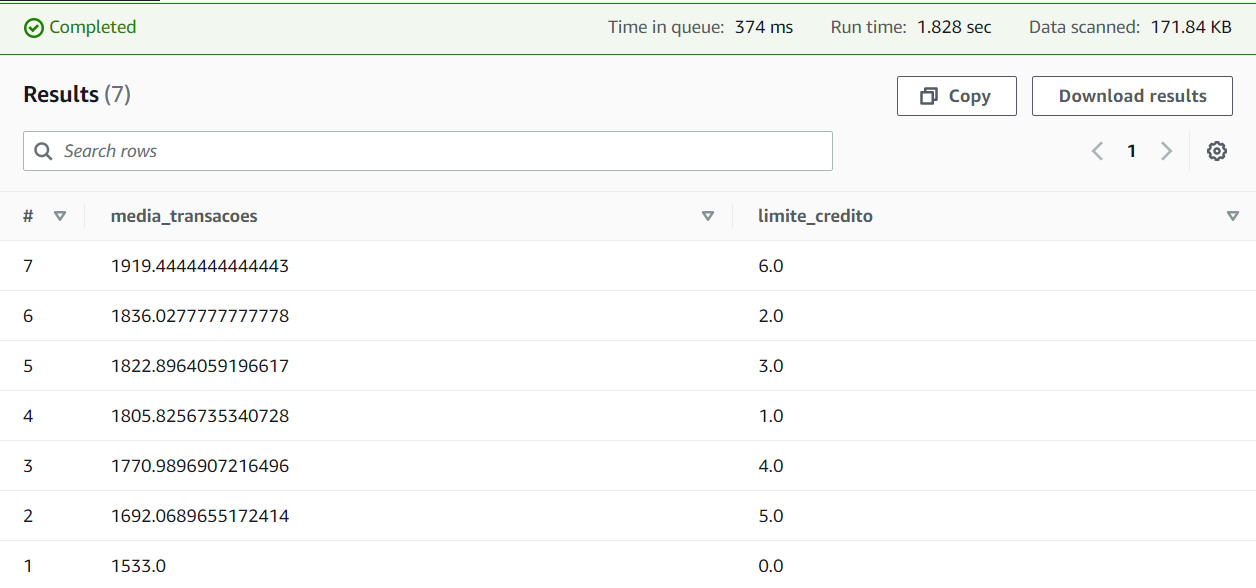)

![query4_grafico[1].png](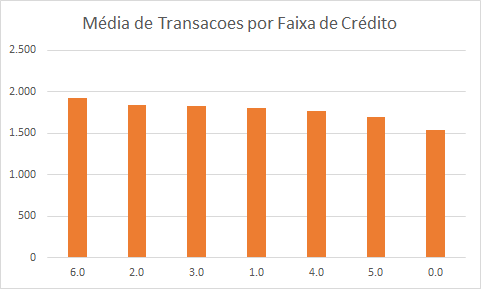)

Nesta análise, verificamos que existe uma **correlaçao direta** entre a **maior faixa de crédito (6.0)** e a quantidade média de **transações** por **cliente**. **Porém**, vale ressaltar novamente o **destaque** para a **categoria 2.0**, que representa o **segundo maior volume** de **transações** por cliente na nossa base, enquanto os clientes na **categoria 5.0** de limite de crédito **representam** o **penúltima** colocação em **volume** de **transações**.

---

## 4\. Conclusão

Esses foram alguns insights interessantes obtidos a partir da anlálise realizada no nosso dataset de crédito:

*   A grande maioria dos clientes possuem algum tipo de limite de crédito.
*   Quase 70% dos clientes estão concentrados nas categorias 3 e 2 de limite de crédito.
*  Apenas 2% dos clientes, aproximadamente, possuem limite de crédito igual a 5 e 6, sendo 6 a mais alta classificação da nossa base.
*  A categoria 2 de limite de crédito é responsável pela maior média de gastos registradas nos últimos 12 meses, seguida pelas categorias 4 e 0.
*  Quando analisamos a quantidade média de transações nos últimos 12 meses, verificamos que os clientes na categoria 6 de limite de crédito possuem a maior média, seguida de perto dos clientes da categoria 2.

É interessante observar que talvez uma exploração maior dos dados, juntamente com outros indicadores, sinalizem oportunidades para a companhia com relação a sua política de conceção de crétido, a fim de adequar os limites de créditos aos gastos médios do seus clientes.



Podemos observar que existe uma catagorização de 0 a 6 referente ao limite de crédito concedido a cada cliente. Apesar do dataset não trazer informações sobre o que esses números representam, podemos inferir que quanto maior a classificação, maior o limite de crédito. 